In [21]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from common.outliers import find_outliers_in_multiple_columns, plot_2d_data_with_outliers

### Constants and settings

In [22]:
numeric_columns = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]

### Load and prepare dataset
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [23]:
# load dataset from file, remove unused columns
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=numeric_columns)

# standardize data
standardization = StandardScaler().fit(data[numeric_columns])
data[numeric_columns] = standardization.transform(data[numeric_columns])

### Outliers detection

<ipython-input-24-6c1e312cd21b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers[numeric_columns] = standardization.inverse_transform(outliers[numeric_columns])
C:\Users\arkad\.conda\envs\Pandas_training\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\arkad\.conda\envs\Pandas_training\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

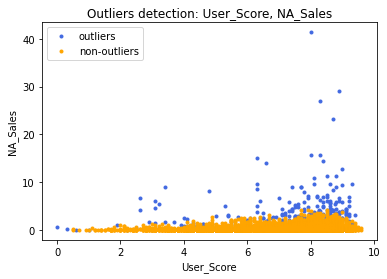

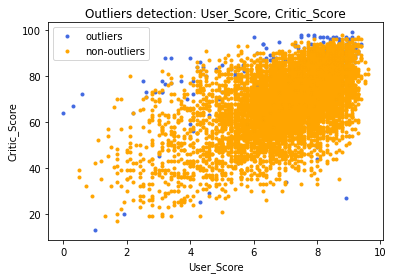

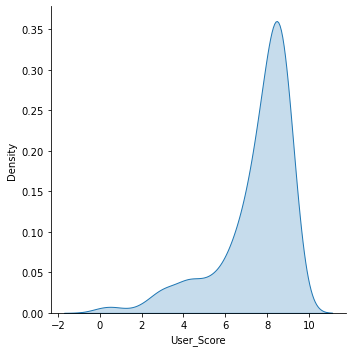

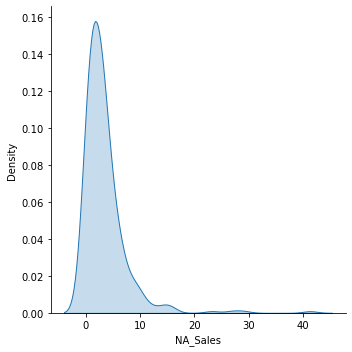

In [24]:
# detect outliers
k_neighbours = 5
r_percentage = 0.03
outliers, non_outliers = find_outliers_in_multiple_columns(data, numeric_columns, k_neighbours, r_percentage)

# reverse data standardization
outliers[numeric_columns] = standardization.inverse_transform(outliers[numeric_columns])
non_outliers[numeric_columns] = standardization.inverse_transform(non_outliers[numeric_columns])

# plot results
plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "NA_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "Critic_Score"))
sns.displot(outliers, x="User_Score", kind="kde", fill=True)
sns.displot(outliers, x="NA_Sales", kind="kde", fill=True)
